In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [9]:
# Parameters

An = 155.32
A = 3.5/1000
f = 2.6
w = 2*np.pi*f
B = 36332.07
gama = 36332.07
n = 2
tf = 60
alpha_a = 1921.141
alpha_b = 5882.51
k0 = 1940.405
c1a = 2089.263
c1b = 14384.918
V = 5
f0 = 0
x0 = 0
k1 = 1.751268
c0a = 651.4718
c0b = 1043.7559
fac = 1

def x(t):
    x = A*np.sin(w*t)
    return x
def dx(t):
    dx = A*w*np.cos(w*t)
    return dx

In [10]:
def dzdt(t, z):
    dzdt = (-gama*np.abs(dx(t))*z*((np.abs(z))**(n-1))) - (B*dx(t)*((np.abs(z))**n)) + (An*dx(t))
    return dzdt

z0 = np.array([0])
t = np.linspace(0, 1, 1001)

sol = solve_ivp(dzdt, t_span= (0,max(t)), y0 = z0, t_eval=t)

z = sol.y[0]
z

array([ 0.        ,  0.00877271,  0.01692516, ..., -0.04622573,
       -0.04622774, -0.04622919])

In [11]:
def vvolt(t, VV):
    return -tf*(VV-V)

VV0 = np.array([0])

sol_VV = solve_ivp(vvolt, t_span=(0,max(t)), y0=VV0, t_eval=t)
V_dot = sol_VV.y[0]
V_dot

array([0.        , 0.29117733, 0.56541837, ..., 4.99898434, 4.99904247,
       4.99909785])

In [12]:
def c1f(VV):
    return c1a+(c1b*VV)

def c0f(VV):
    return c0a+(c0b*VV)

def alpf(VV):
    return alpha_a + (alpha_b*VV)

c1 = c1f(V_dot)
c0 = c0f(V_dot)
alpha = alpf(V_dot)

In [13]:
Fd = c0*dx(t) + k0*(x(t)-x0) + alpha*z
max(Fd)

1785.1853295261726

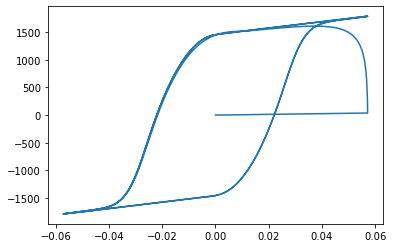

In [16]:
plt.plot(np.insert(dx(t),0,0), np.insert(Fd,0,0))